[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/examples/multimin_mog_quickstart.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Fit of single-valued functions (experimental): tutorial

This notebook illustrates how **MultiMin** can be used to fit functions (not data) of one or many variables.

## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [33]:
try:
    from google.colab import drive
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2
!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

Not running in Colab, skipping installation
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import multimin as mn
mn.show_watermark = True

import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d

import numpy as np
np.random.seed(1)
deg = np.pi/180

import warnings
warnings.filterwarnings("ignore")

figprefix = "functions"

## Round-trip test

For this test we will create a mock function using not-normalized MoG and see if our fitter is able to reconstruct the function.

Let's generate a function using two MoG:

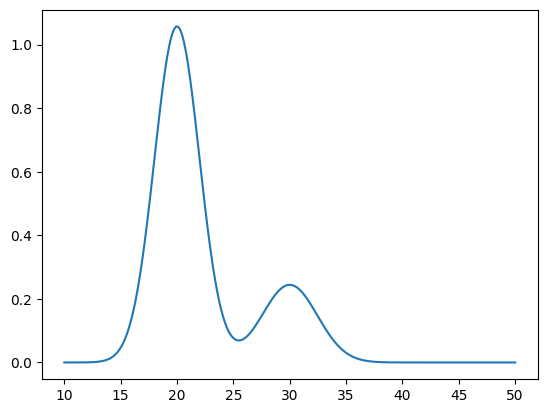

In [35]:
mog = mn.MixtureOfGaussians(mus=[20, 30], Sigmas=[4, 6], weights=[5.3, 1.5], normalize_weights=False)

xs = np.linspace(10, 50, 1000)
ys = mog.pdf(xs)
plt.plot(xs, ys)
plt.show()


Now let's fit it to verify:

Loading a FitFunctionMoG object.
Number of gaussians: 2
Number of variables: 1
Number of dimensions: 2
Number of grid points: 1000
Domain: [[10.0, 50.0]]
Iterations:
  Iter 0: loss = 33.6033
  Iter 10: loss = 2.82009
  Iter 20: loss = 4.95358e-05
  Iter 25: loss = 3.84177e-10


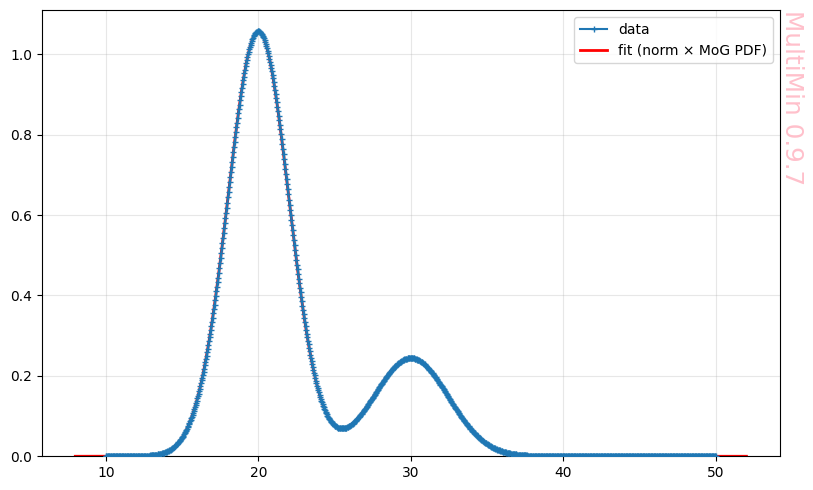

In [40]:
F = mn.FitFunctionMoG(data=(xs, ys), ngauss=2)
F.fit_data(advance=10, tol=1e-8, options=dict(maxiter=2000))
fig = F.plot_fit()

The fit is perfect.

After fitting, we can report how well the model matches the function on the grid. **MultiMin** uses the **R² (coefficient of determination)**:

$$R^2 = 1 - \frac{SS_{\mathrm{res}}}{SS_{\mathrm{tot}}},$$

where the residual and total sums of squares are

$$SS_{\mathrm{res}} = \sum_i (F_i - \hat{F}_i)^2 \qquad \text{(residual)}, \qquad SS_{\mathrm{tot}} = \sum_i (F_i - \bar{F})^2 \qquad \text{(total)},$$

with $\hat{F}_i$ the predicted value at point $i$ and $\bar{F} = \frac{1}{n}\sum_i F_i$ the mean of the data. So $R^2 = 1$ means a perfect fit; $R^2 = 0$ means the model explains no variance beyond the mean; $R^2 < 0$ is possible if the fit is worse than using the constant $\bar{F}$.

In [41]:
R2 = F.quality_of_fit()

Quality of fit (after fit_data):
  R²    = 1  (1 = perfect, 0 = no better than mean)


## Non-gaussian function

Let's test the package with non-gaussian functions:

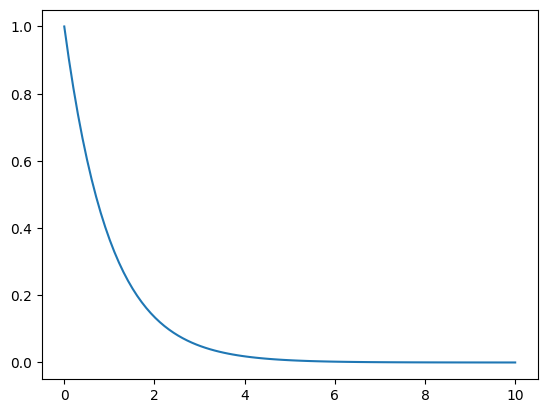

In [42]:
xs = np.linspace(0, 10, 100)
ys = np.exp(-xs)

plt.plot(xs, ys)

Let's fit it with one gaussian:

Loading a FitFunctionMoG object.
Number of gaussians: 1
Number of variables: 1
Number of dimensions: 1
Number of grid points: 100
Domain: [[0.0, 10.0]]
Iterations:
  Iter 0: loss = 0.298364
  Iter 6: loss = 0.165371


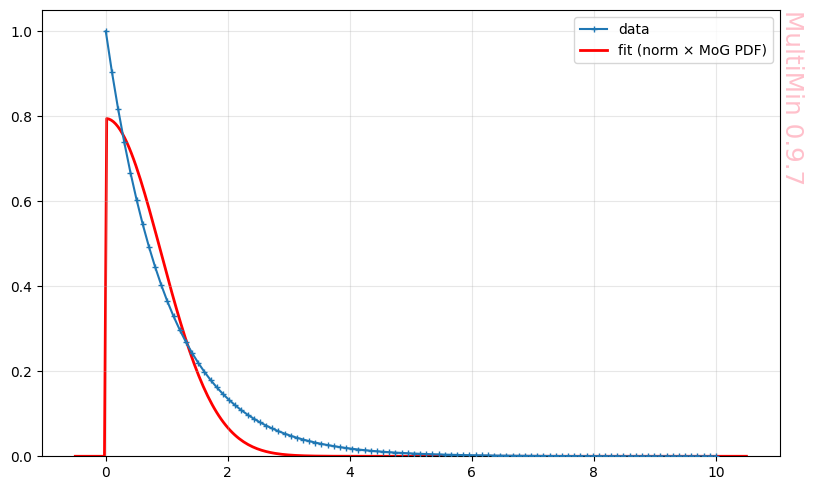

In [44]:
F = mn.FitFunctionMoG(data=(xs, ys), ngauss=1)
F.fit_data(advance=10, tol=1e-8, options=dict(maxiter=2000))
fig = F.plot_fit()

Increasing the number of gaussians:

Loading a FitFunctionMoG object.
Number of gaussians: 3
Number of variables: 1
Number of dimensions: 3
Number of grid points: 100
Domain: [[0.0, 10.0]]
Iterations:
  Iter 0: loss = 0.152781
  Iter 10: loss = 0.0403425
  Iter 20: loss = 0.0121464
  Iter 30: loss = 0.00851867
  Iter 40: loss = 0.00561627
  Iter 50: loss = 0.00468426
  Iter 60: loss = 0.00285891
  Iter 70: loss = 0.00265979
  Iter 71: loss = 0.00265979


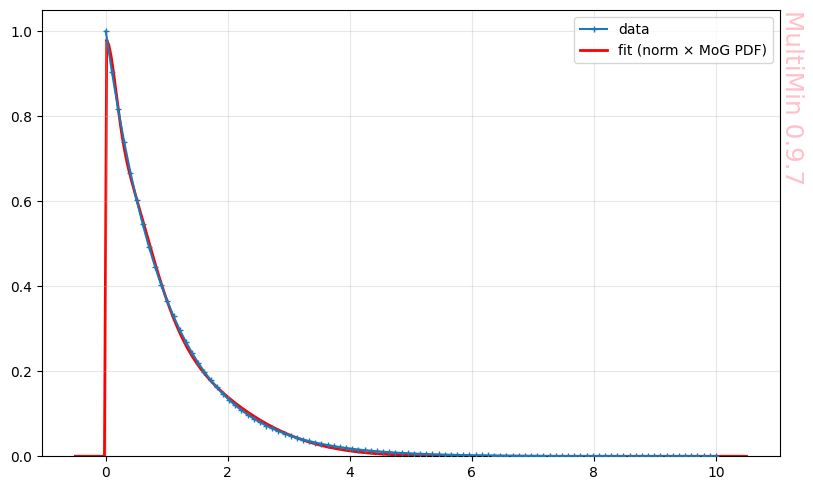

In [45]:
F = mn.FitFunctionMoG(data=(xs, ys), ngauss=3)
F.fit_data(advance=10, tol=1e-8, options=dict(maxiter=2000))
fig = F.plot_fit()

With a quality:

In [46]:
R2 = F.quality_of_fit()

Quality of fit (after fit_data):
  R²    = 0.999393  (1 = perfect, 0 = no better than mean)


Let's try a trigonometric function:

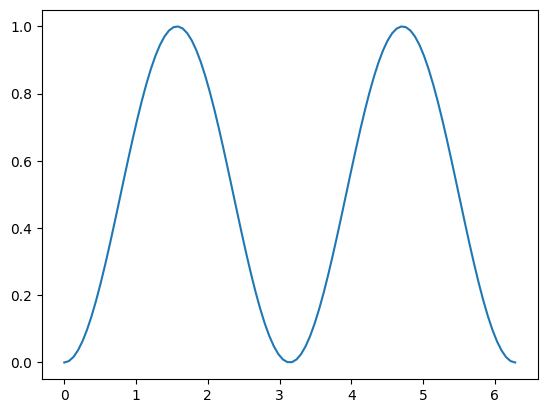

In [47]:
xs = np.linspace(0, 2*np.pi, 100)
ys = np.sin(xs)**2

plt.plot(xs, ys)

The natural choice will be 2 gaussians:

Loading a FitFunctionMoG object.
Number of gaussians: 2
Number of variables: 1
Number of dimensions: 2
Number of grid points: 100
Domain: [[0.0, 6.283185307179586]]
Iterations:
  Iter 0: loss = 18.6377
  Iter 12: loss = 0.128094
Quality of fit (after fit_data):
  R²    = 0.989857  (1 = perfect, 0 = no better than mean)


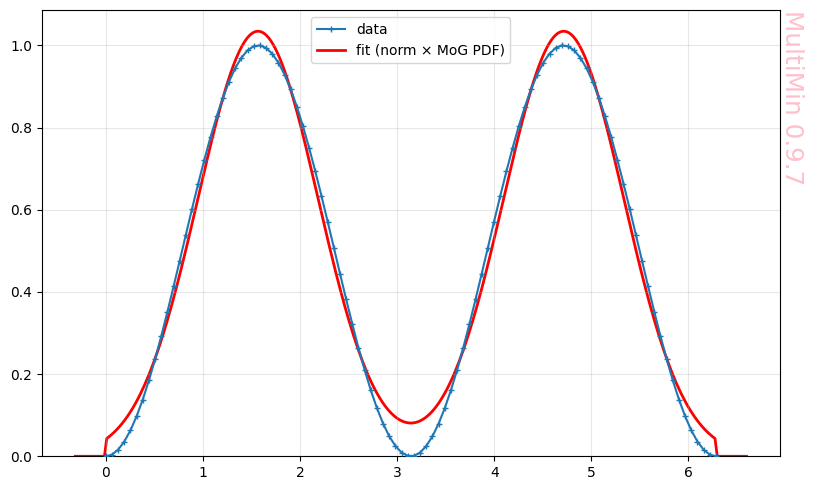

In [48]:
F = mn.FitFunctionMoG(data=(xs, ys), ngauss=2)
F.fit_data(advance=100, tol=1e-8, options=dict(maxiter=2000))
fig = F.plot_fit()
R2 = F.quality_of_fit()

But the fit is not perfect due to the nature of the trigonometric function. We can force the fit using many gaussians:

Loading a FitFunctionMoG object.
Number of gaussians: 10
Number of variables: 1
Number of dimensions: 10
Number of grid points: 100
Domain: [[0.0, 6.283185307179586]]
Iterations:
  Iter 0: loss = 5.20621
  Iter 100: loss = 0.00181871
  Iter 200: loss = 0.00109109
  Iter 300: loss = 0.00105513
  Iter 400: loss = 0.00100811
  Iter 449: loss = 0.000972371
Quality of fit (after fit_data):
  R²    = 0.999923  (1 = perfect, 0 = no better than mean)


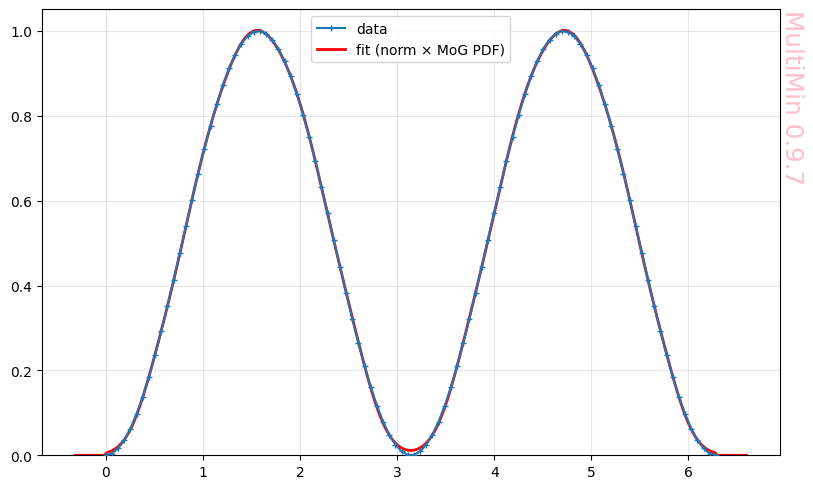

In [49]:
F = mn.FitFunctionMoG(data=(xs, ys), ngauss=10)
F.fit_data(advance=100, tol=1e-8, options=dict(maxiter=2000))
fig = F.plot_fit()
R2 = F.quality_of_fit()

## A realistic function

Let's work with a real case. This data comes from the research in the Wow! signal:

In [50]:
%%file gallery/DSR-schema-TR_148.dat
tau,ISR
0.6097656250000227, 0.005664062500000178
85.88125000000002, 0.005395507812500533
157.19921875000006, 0.005170898437500515
203.70742187499997, 0.010693359375000266
225.40234375, 0.027631835937500515
239.32421875000006, 0.0786083984374999
247.01640625, 0.1749560546875002
254.69453125, 0.29397949218750075
259.24023437499994, 0.46403320312500007
265.30820312500003, 0.6794335937500002
272.8175781250001, 1.0705664062500004
278.7765625, 1.4617041015625
283.1746093750001, 1.8698535156250002
287.583203125, 2.26099609375
290.592578125, 2.4083789062500003
292.0867187500001, 2.4990771484375003
295.1453125, 2.5670947265625004
298.2250000000001, 2.6010986328125
301.346875, 2.5670751953125004
302.93945312500006, 2.4990429687500004
306.0894531249999, 2.4196679687500002
309.2816406250001, 2.272265625
315.72578125, 1.8810888671875003
320.63359375, 1.4672412109375004
323.9734374999999, 1.0817431640625002
333.52187499999997, 0.6848876953125003
336.75624999999997, 0.46945800781250036
343.059765625, 0.3050390625000001
347.7777343750001, 0.19731445312500018
352.4781249999999, 0.11793457031250032
360.26875, 0.05555175781250021
369.59570312499994, 0.01583984375000025
378.9085937500001, -0.0011962890624999112
392.8410156249999, 0.03277343749999995
403.655078125, 0.0950976562500001
412.90820312500006, 0.1744335937499999
422.14375, 0.2821142578125002
429.8289062500001, 0.3897998046875002
437.49999999999994, 0.5201611328125004
445.16406250000006, 0.6618603515625003
449.744921875, 0.7752246093750004
457.440625, 0.8659033203125004
462.06015625000003, 0.9169091796875004
468.2511718750001, 0.9338964843750004
474.47031250000015, 0.9055322265625003
479.14609375000003, 0.8658349609375007
486.94726562499994, 0.7864453125000006
494.77304687500003, 0.6673730468750003
502.61640625, 0.5199560546875004
510.45273437500003, 0.38387695312500014
521.38984375, 0.24778808593750012
536.974609375, 0.11735351562500052
554.078125, 0.03793457031250025
572.7074218750001, -0.0018066406249999112
592.8625000000002, -0.0018701171874999645
613.0035156250001, 0.02074218750000023
634.6878906250001, 0.054687500000000444
651.717578125, 0.09431640624999993
671.833984375, 0.1566113281249999
690.4000000000001, 0.21891113281249996
705.8828125, 0.2528759765625006
721.3832031249999, 0.25849609375000027
735.3437500000002, 0.24711425781250007
747.7609375, 0.2243994140625003
761.7390625, 0.18467285156250002
780.3753906250001, 0.13359375000000018
799.0082031250001, 0.08818359375000062
819.1878906250001, 0.04843749999999991
842.4613281249999, 0.020019531250000444
870.3789062500002, 0.0029248046875003375
906.0414062499999, -0.0028564453124997335
960.3050781249999, -0.003027343749999911
1026.9683593750003, 0.002431640625000675
1079.674609375, 0.013603515625000284
1174.24140625, 0.02464355468750057

Overwriting gallery/DSR-schema-TR_148.dat


Read and interpolate the data:

362


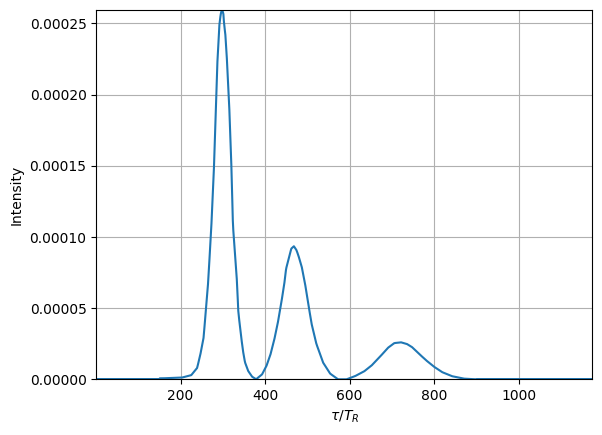

In [51]:
kind = 'linear'
DSR148 = pd.read_csv('gallery/DSR-schema-TR_148.dat', sep=',', comment='#')
ISR148fun = interp1d(DSR148.tau, DSR148.ISR, kind=kind)

taus148 = np.linspace(DSR148.tau.iloc[0], DSR148.tau.iloc[-1],1000)
ISRs148 = ISR148fun(taus148)*1e-4
cond = (taus148<150) | (taus148>900)
print(np.sum(cond))
ISRs148[cond] = 0

plt.plot(taus148,ISRs148)
plt.xlabel(r'$\tau/T_R$')
plt.ylabel(r'Intensity')
#plt.xlim(200,1000)
plt.margins(0)
plt.grid()
plt.savefig(f"gallery/{figprefix}_realistic_function.png")

The goal is to fit the curves with gaussians.

In [56]:
F = mn.FitFunctionMoG(data=(taus148, ISRs148), ngauss=3)

Loading a FitFunctionMoG object.
Number of gaussians: 3
Number of variables: 1
Number of dimensions: 3
Number of grid points: 1000
Domain: [[0.6097656250000227, 1174.24140625]]


Let's try a blind fit, namely, a fit that doew not take into account the data structure:

Iterations:
  Iter 0: loss = 22.2714
  Iter 10: loss = 21.1054
  Iter 20: loss = 3.30653
  Iter 30: loss = 2.24439
  Iter 40: loss = 2.2335
  Iter 50: loss = 0.81642
  Iter 59: loss = 0.807561


TypeError: FitFunctionMoG.quality_of_fit() got an unexpected keyword argument 'sargs'

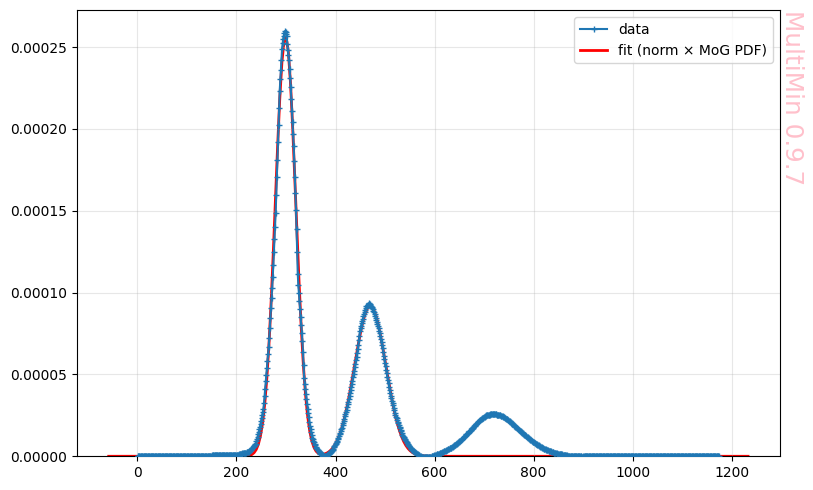

In [57]:
F.fit_data(advance=10)
fig = F.plot_fit()
R2 = F.quality_of_fit(sargs=dict(lw=0))
plt.savefig(f"gallery/{figprefix}_realistic_function_blind_fit.png")


It's curious that it does not detect the third peak.

Let's try with a larger number of gaussians:

Loading a FitFunctionMoG object.
Number of gaussians: 10
Number of variables: 1
Number of dimensions: 10
Number of grid points: 1000
Domain: [[0.6097656250000227, 1174.24140625]]
Iterations:
  Iter 0: loss = 6.39592
  Iter 50: loss = 0.0630943
  Iter 100: loss = 0.0344475
  Iter 150: loss = 0.0337737
  Iter 200: loss = 0.0335375
  Iter 250: loss = 0.0335211
  Iter 275: loss = 0.0335186
Quality of fit (after fit_data):
  R²    = 0.998913  (1 = perfect, 0 = no better than mean)


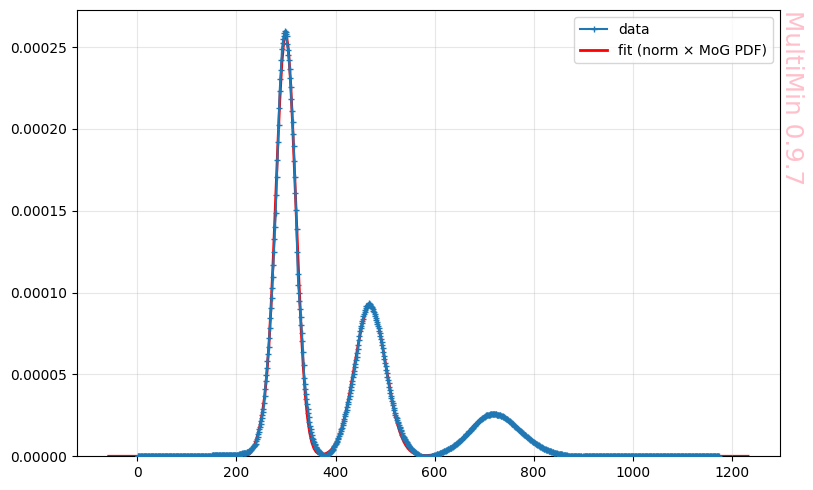

In [54]:
F = mn.FitFunctionMoG(data=(taus148, ISRs148), ngauss=10)
F.fit_data(
    advance=50,
    tol=1e-8,
    options=dict(maxiter=2000),
)
fig = F.plot_fit()
R2 = F.quality_of_fit()
plt.savefig(f"gallery/{figprefix}_realistic_function_blind_fit_Ngaussians.png")

Here you may verify that the when $M\rightarrow \infty$ the function can be better described by a NMD.

## Multimodal Mode

When data exhibits a multimodal distribution, it can be challenging to fit a single Gaussian to the data. In such cases, using a multivariate Gaussian (MoG) can be a more appropriate approach. The MoG allows for the modeling of multiple peaks in the data, each with its own mean, standard deviation, and correlation structure.

Loading a FitFunctionMoG object.
Number of gaussians: 5
Number of variables: 1
Number of dimensions: 5
Number of grid points: 1000
Domain: [[0.6097656250000227, 1174.24140625]]
Iterations:
  Iter 0: loss = 0.500873
  Iter 10: loss = 0.115553
  Iter 18: loss = 0.113307
Quality of fit (after fit_data):
  R²    = 0.996324  (1 = perfect, 0 = no better than mean)


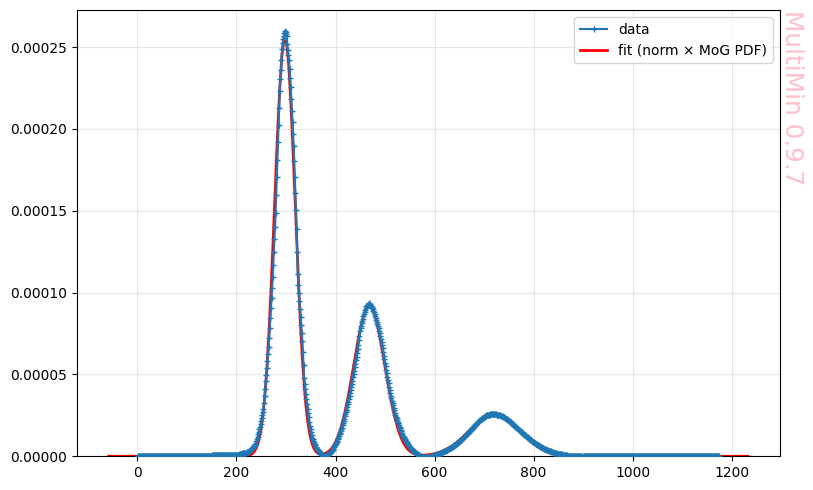

In [58]:
# Since you will use the multimodal mode, the ngauss parameter can be changed.
F = mn.FitFunctionMoG(data=(taus148, ISRs148), ngauss=5)

F.fit_data(
    advance=10,
    mode='multimodal'
)

fig = F.plot_fit()
R2 = F.quality_of_fit()
plt.savefig(f"gallery/{figprefix}_realistic_function_multimodal_3gaussian.png")

These are the properties of the involved gaussians:

In [59]:
F.mog.tabulate()

,w,mu_1,sigma_1
component,,,
1,0.441076,297.835797,426.029887
2,0.240521,468.182732,986.130627
3,0.109670,720.766118,2607.653537


In [60]:
function, mog = F.mog.get_function()

import numpy as np
from multimin import Util

def mog(X):

    a = 0.609766
    b = 1174.241406

    mu1_1 = 297.835797
    sigma1_1 = 426.029887
    n1 = Util.tnmd(X, mu1_1, sigma1_1, a, b)

    mu2_1 = 468.182732
    sigma2_1 = 986.130627
    n2 = Util.tnmd(X, mu2_1, sigma2_1, a, b)

    mu3_1 = 720.766118
    sigma3_1 = 2607.653537
    n3 = Util.tnmd(X, mu3_1, sigma3_1, a, b)

    w1 = 0.441076
    w2 = 0.240521
    w3 = 0.10967

    return (
        w1*n1
        + w2*n2
        + w3*n3
    )


## Noisy data

Let's add some noise to the data:

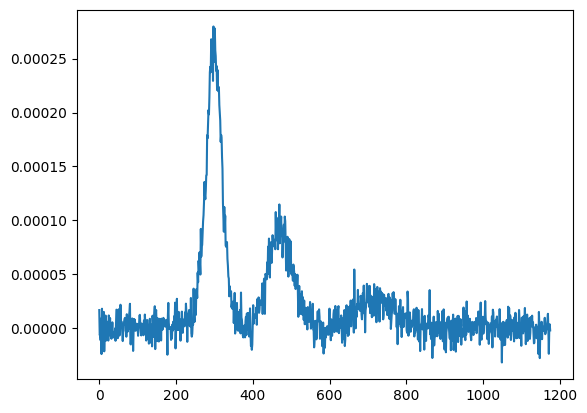

In [61]:
Fmax = ISRs148.max()
ISRs148_noisy = ISRs148 + np.random.normal(0, 0.04*Fmax, len(ISRs148))
plt.plot(taus148, ISRs148_noisy)
plt.savefig(f"gallery/{figprefix}_realistic_function_noisy.png")


Let's try the blind fit:

Loading a FitFunctionMoG object.
Number of gaussians: 3
Number of variables: 1
Number of dimensions: 3
Number of grid points: 1000
Domain: [[0.6097656250000227, 1174.24140625]]
Iterations:
  Iter 0: loss = 25.3777
  Iter 10: loss = 24.2184
  Iter 20: loss = 23.8784
  Iter 30: loss = 6.11474
  Iter 40: loss = 3.78667
  Iter 50: loss = 3.2806
Quality of fit (after fit_data):
  R²    = 0.881836  (1 = perfect, 0 = no better than mean)


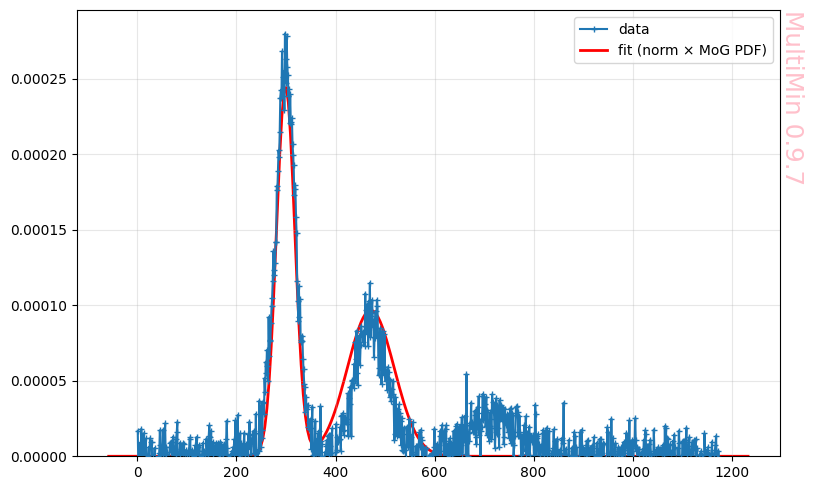

In [62]:
F = mn.FitFunctionMoG(data=(taus148, ISRs148_noisy), ngauss=3)

F.fit_data(
    advance=10
)

fig = F.plot_fit()
R2 = F.quality_of_fit()

plt.savefig(f"gallery/{figprefix}_realistic_function_blind_fit_noisy.png")

The fitter is not able to detect properly all peaks in the signal.

For detecting the peaks we have the fitter mode **noisy** which soften the data and using the result find the guess position of the peaks and fit:

Loading a FitFunctionMoG object.
Number of gaussians: 3
Number of variables: 1
Number of dimensions: 3
Number of grid points: 1000
Domain: [[0.6097656250000227, 1174.24140625]]
Iterations:
  Iter 0: loss = 1.6994
  Iter 10: loss = 1.42383
  Iter 20: loss = 1.3972
  Iter 30: loss = 1.39143
  Iter 40: loss = 1.38936
  Iter 50: loss = 1.38807
  Iter 55: loss = 1.38807
Quality of fit (after fit_data):
  R²    = 0.950003  (1 = perfect, 0 = no better than mean)


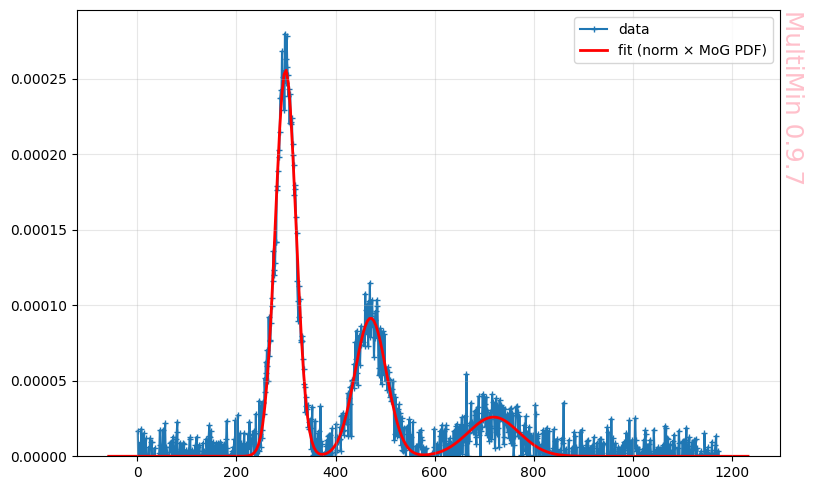

In [64]:
# In the noisy mode, you need to provide a guess for the number of gaussians.
F = mn.FitFunctionMoG(data=(taus148, ISRs148_noisy), ngauss=3)

F.fit_data(
    mode='noisy',
    advance=10
)

fig = F.plot_fit()
R2 = F.quality_of_fit()
plt.savefig(f"gallery/{figprefix}_realistic_function_fit_noisy.png")

This is a good fit.

There is a final option and it consist in leaving the algorithm to look for the peaks and fix the means in the found peaks. It's similar to multimodal but with the softening of the noisy mode.

Loading a FitFunctionMoG object.
Number of gaussians: 5
Number of variables: 1
Number of dimensions: 5
Number of grid points: 1000
Domain: [[0.6097656250000227, 1174.24140625]]
Iterations:
  Iter 0: loss = 1.70071
  Iter 10: loss = 1.55215
  Iter 13: loss = 1.55215
Quality of fit (after fit_data):
  R²    = 0.944093  (1 = perfect, 0 = no better than mean)


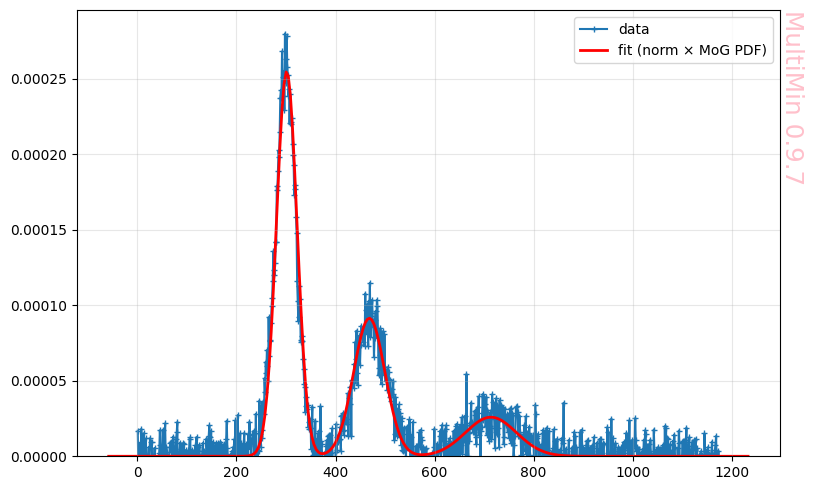

In [65]:
F = mn.FitFunctionMoG(data=(taus148, ISRs148_noisy), ngauss=5)
F.fit_data(
    mode='noisy_multimodal',
    advance=10
)
fig = F.plot_fit()
R2 = F.quality_of_fit()
plt.savefig(f"gallery/{figprefix}_realistic_function_blind_fit_noisy_multimodal.png")

If you compare this fit with the pure noisy mode, you will find that the nosiy mode, where the mean values are free works better.

## Emmission line

In the following examples we follow the procedures when testing the similar package https://github.com/gausspy/gausspy.

### Single line

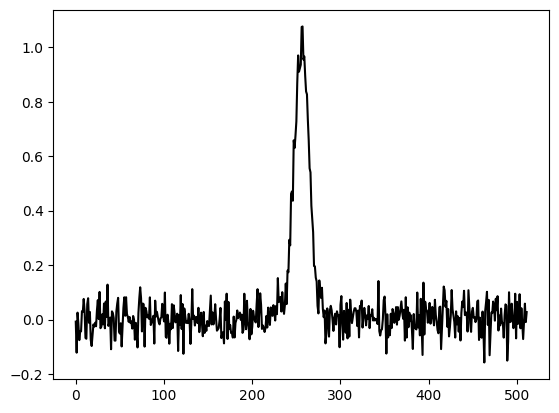

In [66]:
# Code adapted from: https://github.com/gausspy/gausspy/blob/master/docs/tutorial.rst

import numpy as np
import pickle

# create a function which returns the values of the Gaussian function for a
# given x
def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

# Data properties
RMS = 0.05
NCHANNELS = 512
FILENAME = 'simple_gaussian.pickle'

# Component properties
AMP = 1.0
FWHM = 20
MEAN = 256

# Initialize
data = {}
chan = np.arange(NCHANNELS)
errors = np.ones(NCHANNELS) * RMS

spectrum = np.random.randn(NCHANNELS) * RMS
spectrum += gaussian(AMP, FWHM, MEAN)(chan)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
plt.savefig(f"gallery/{figprefix}_test_single_line.png")


Our fit produces:

Loading a FitFunctionMoG object.
Number of gaussians: 1
Number of variables: 1
Number of dimensions: 1
Number of grid points: 512
Domain: [[0.0, 511.0]]
Iterations:
  Iter 0: loss = 1.15533
  Iter 4: loss = 1.15392
Quality of fit (after fit_data):
  R²    = 0.914505  (1 = perfect, 0 = no better than mean)


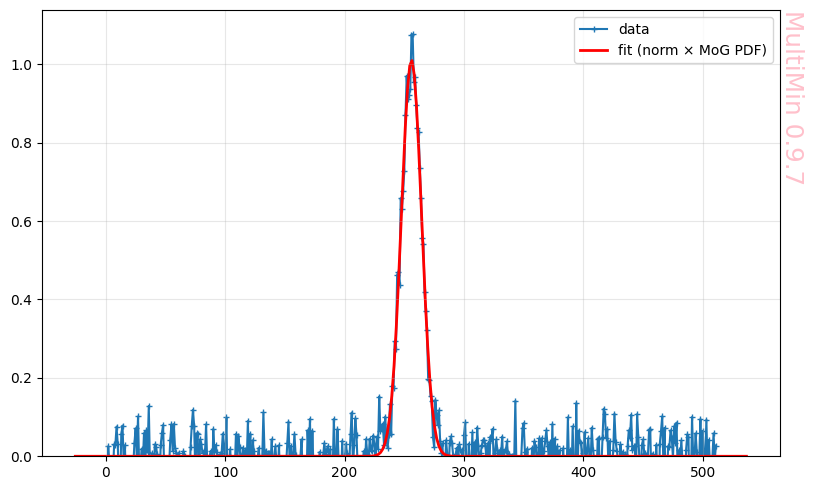

In [68]:
F = mn.FitFunctionMoG(data=(chan, spectrum), ngauss=1)
F.fit_data(
    advance=10,
    mode='noisy_multimodal',
)
fig = F.plot_fit()
R2 = F.quality_of_fit()
F.mog.tabulate()
plt.savefig(f"gallery/{figprefix}_fit_test_single_line.png")

### Complex line

This is an example with a complex profile line provided by **GaussPy**:

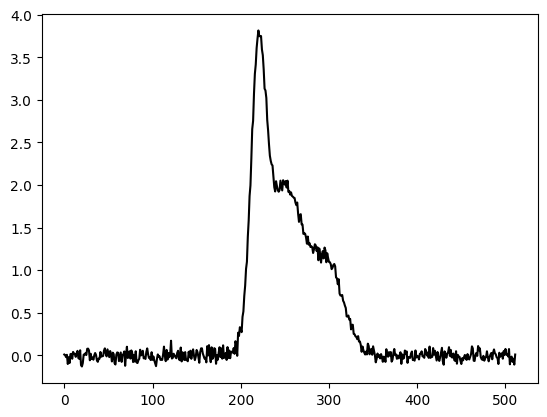

In [69]:
import numpy as np
import pickle

def gaussian(amp, fwhm, mean):
    return lambda x: amp * np.exp(-4. * np.log(2) * (x-mean)**2 / fwhm**2)

# Number of Gaussian functions per spectrum
NCOMPS = 3

# Component properties
AMPS = [3,2,1]
FWHMS = [20,50,40] # channels
MEANS = [220,250,300] # channels

# Data properties
RMS = 0.05
NCHANNELS = 512

# Initialize
data = {}
chan = np.arange(NCHANNELS)
errors = np.ones(NCHANNELS) * RMS

spectrum = np.random.randn(NCHANNELS) * RMS

# Create spectrum
for a, w, m in zip(AMPS, FWHMS, MEANS):
    spectrum += gaussian(a, w, m)(chan)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(chan, spectrum, label='Data', color='black', linewidth=1.5)
plt.savefig(f"gallery/{figprefix}_complex_line.png")

A free 3 gaussian fit produces:

Loading a FitFunctionMoG object.
Number of gaussians: 3
Number of variables: 1
Number of dimensions: 3
Number of grid points: 512
Domain: [[0.0, 511.0]]
Iterations:
  Iter 0: loss = 7.41858
  Iter 16: loss = 4.34336
Quality of fit (after fit_data):
  R²    = 0.822809  (1 = perfect, 0 = no better than mean)


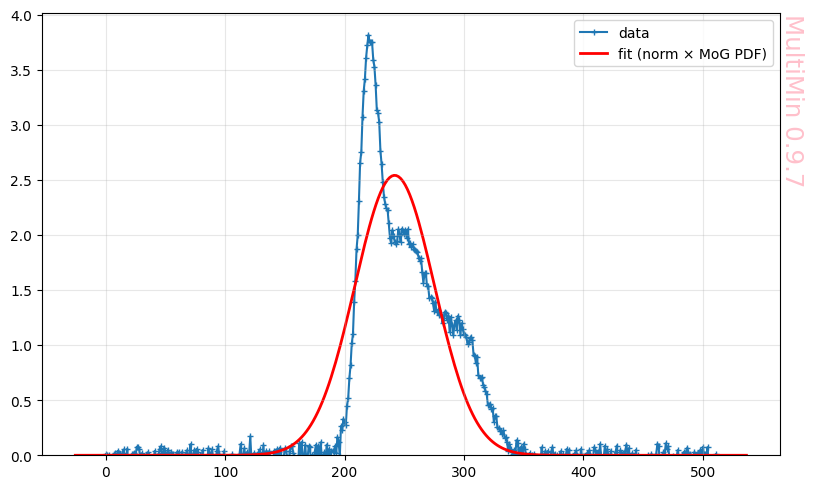

In [70]:
F = mn.FitFunctionMoG(data=(chan, spectrum), ngauss=3)

F.fit_data(
    advance=50
)

fig = F.plot_fit()
R2 = F.quality_of_fit()
F.mog.tabulate()
plt.savefig(f"gallery/{figprefix}_blind_fit_complex_line.png")

The fit is terrible.

For signals without an identifiable set of peaks we have an adptive mode:

Loading a FitFunctionMoG object.
Number of gaussians: 1
Number of variables: 1
Number of dimensions: 1
Number of grid points: 512
Domain: [[0.0, 511.0]]
    Iterations:
      Iter 0: loss = 30.5374
      Iter 1: loss = 30.5374
    Iterations:
      Iter 0: loss = 4.63307
      Iter 9: loss = 0.407061
    Iterations:
      Iter 0: loss = 4.34513
      Iter 3: loss = 4.34336
    Iterations:
      Iter 0: loss = 2.16846
      Iter 10: loss = 0.407061
    Iterations:
      Iter 0: loss = 0.482297
      Iter 10: loss = 0.0940742
      Iter 12: loss = nan
    Iterations:
      Iter 0: loss = 0.963279
      Iter 10: loss = 0.0925984
      Iter 17: loss = 0.0919247
      Iterations:
        Iter 0: loss = 0.113288
        Iter 7: loss = 0.091706
Quality of fit (after fit_data):
  R²    = 0.996259  (1 = perfect, 0 = no better than mean)


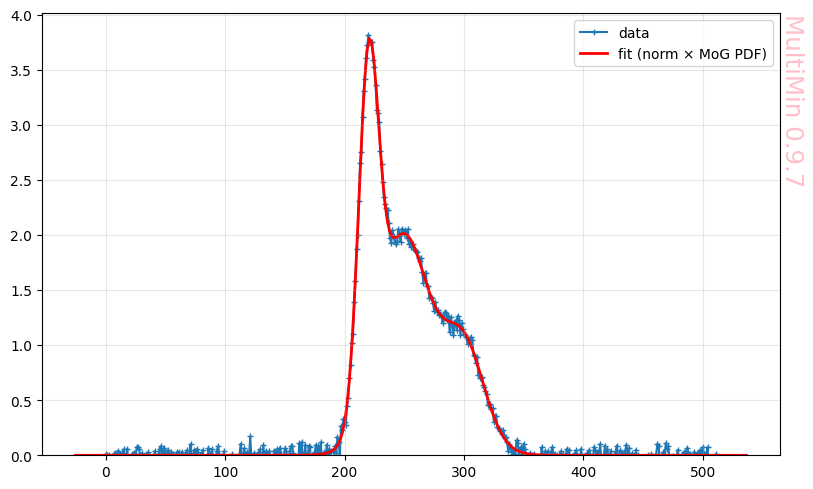

In [73]:
F = mn.FitFunctionMoG(data=(chan, spectrum), ngauss=1)
F.fit_data(
    advance=10,
    mode='adaptive',
    atol=0.99
)
fig = F.plot_fit()
R2 = F.quality_of_fit()
plt.savefig(f"gallery/{figprefix}_adaptive_fit_complex_line.png")

In [74]:
F.mog.tabulate()

,w,mu_1,sigma_1
component,,,
2,0.461092,247.068570,400.570528
1,0.365791,219.962128,70.047311
3,0.231150,269.652031,835.537774
4,0.184882,300.656764,280.011978


---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga